In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 400)

from utils import *



import warnings
warnings.filterwarnings("ignore")

/home/jonathan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data exploration

In [2]:
train_df = pd.read_csv('train.csv')
train_df.drop(['Unnamed: 0'], axis =1 , inplace = True)
test_df = pd.read_csv('test.csv')

display(train_df.head())
display('train_df shape:', train_df.shape)
print()
display('test_df shape:', test_df.shape)
display(test_df.head())


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

'train_df shape:'

(13730, 166)

'test_df shape:'

(4576, 47)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [3]:
# train dataset contains test features ?
if set(test_df.columns).issubset(set(train_df.columns)) == True:
    print('train dataset contains all test features')
else:
    print('train dataset does not contain all test features')

train dataset contains all test features


Frist, Let's reduce the train data set in order to work with the same features 
- Let's set both data frame with the same features (training set will have the NU_NOTA_MT column though) 

In [4]:
# test_df columns 
test_df.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
# Y 
Y_math_grade = train_df.NU_NOTA_MT

#X
x_train = train_df.loc[:, test_df.columns] # all test_df columns 
x_train['NU_NOTA_MT'] = Y_math_grade # Add NU_NOTA_MT at the end of the df

display('train_subset_df shape:',x_train.shape)

x_train.head()

'train_subset_df shape:'

(13730, 48)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [6]:
# Unique value per feature
unique_dict = {}    
for feature in x_train.columns[1:]:    
    unique_dict[feature] = x_train[feature].unique()
    
unique_dict   

{'CO_UF_RESIDENCIA': array([43, 23, 33, 13, 29, 51, 26, 31, 21, 24, 50, 41, 15, 53, 52, 32, 35,
        42, 22, 17, 16, 25, 11, 28, 27, 12, 14]),
 'SG_UF_RESIDENCIA': array(['RS', 'CE', 'RJ', 'AM', 'BA', 'MT', 'PE', 'MG', 'MA', 'RN', 'MS',
        'PR', 'PA', 'DF', 'GO', 'ES', 'SP', 'SC', 'PI', 'TO', 'AP', 'PB',
        'RO', 'SE', 'AL', 'AC', 'RR'], dtype=object),
 'NU_IDADE': array([24, 17, 21, 25, 28, 18, 16, 29, 27, 19, 20, 30, 22, 15, 40, 23, 37,
        32, 38, 26, 42, 44, 34, 48, 31, 52, 43, 36, 45, 39, 57, 33, 49, 35,
        47, 46, 14, 51, 59, 56, 50, 41, 65, 55, 54, 53, 62, 63, 67, 61, 60,
        64, 58, 66, 13]),
 'TP_SEXO': array(['M', 'F'], dtype=object),
 'TP_COR_RACA': array([1, 3, 0, 2, 4, 5]),
 'TP_NACIONALIDADE': array([1, 2, 3, 4, 0]),
 'TP_ST_CONCLUSAO': array([1, 2, 3, 4]),
 'TP_ANO_CONCLUIU': array([ 4,  0,  9,  1,  8,  7,  2,  6, 10,  5,  3]),
 'TP_ESCOLA': array([1, 2, 3, 4]),
 'TP_ENSINO': array([nan,  1.,  3.,  2.]),
 'IN_TREINEIRO': array([0, 1]),
 'TP_DEPE

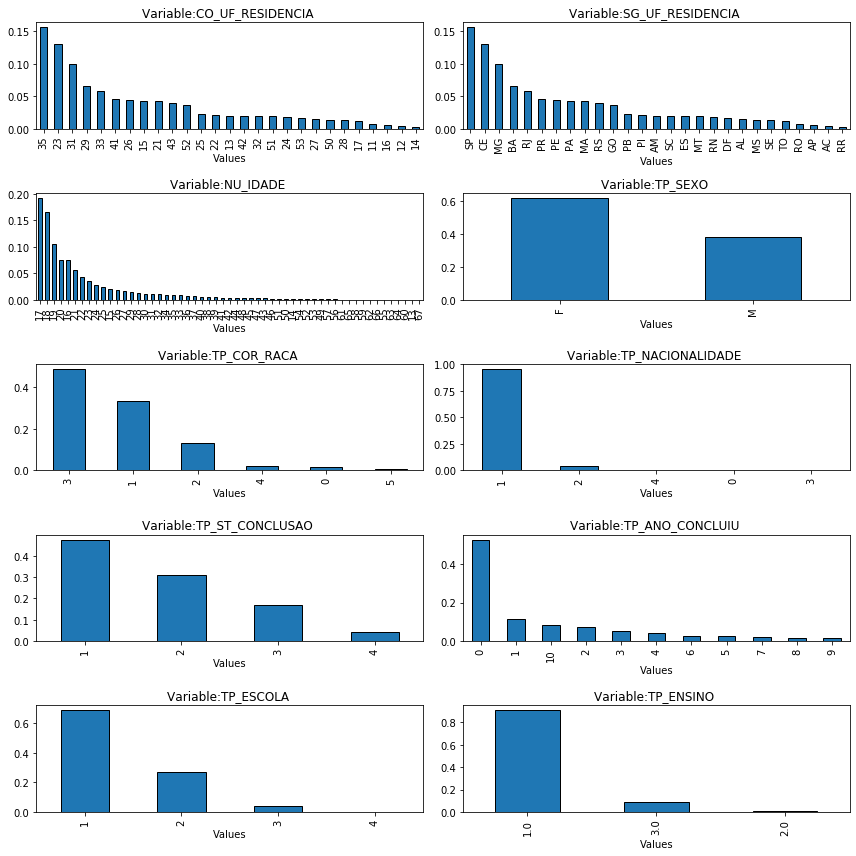

In [7]:
from utils import bar_plot
bar_plot(x_train, 
          len(x_train.columns[1:11]),
          x_train.columns[1:11],
          5,
          2)

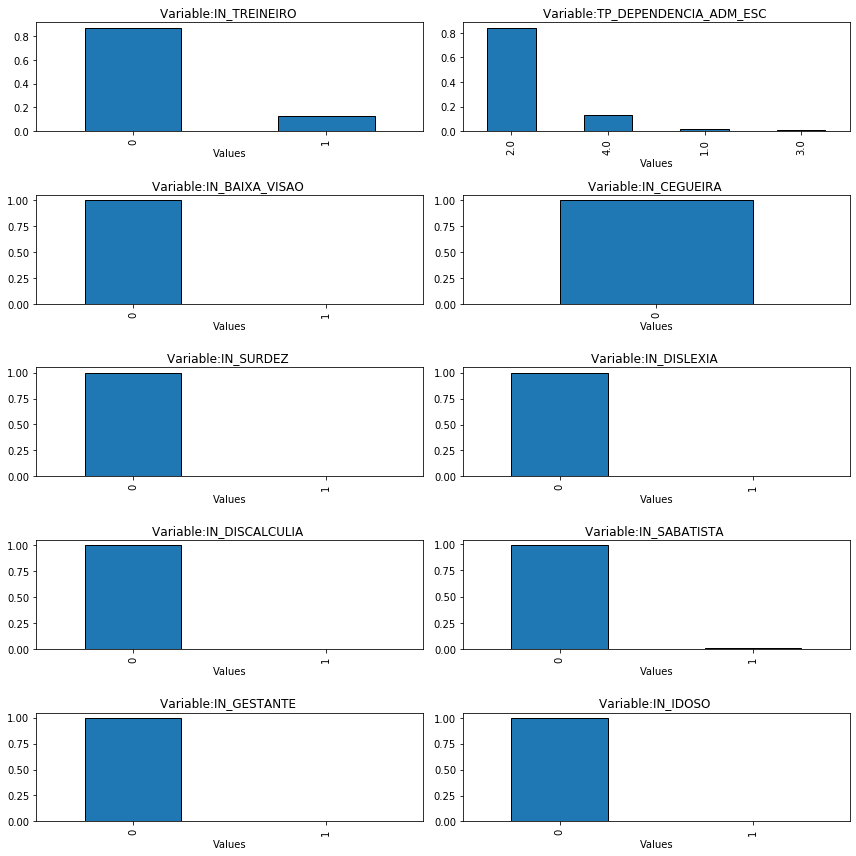

In [8]:
bar_plot(x_train, 
          len(x_train.columns[11:21]),
          x_train.columns[11:21],
          5,
          2)

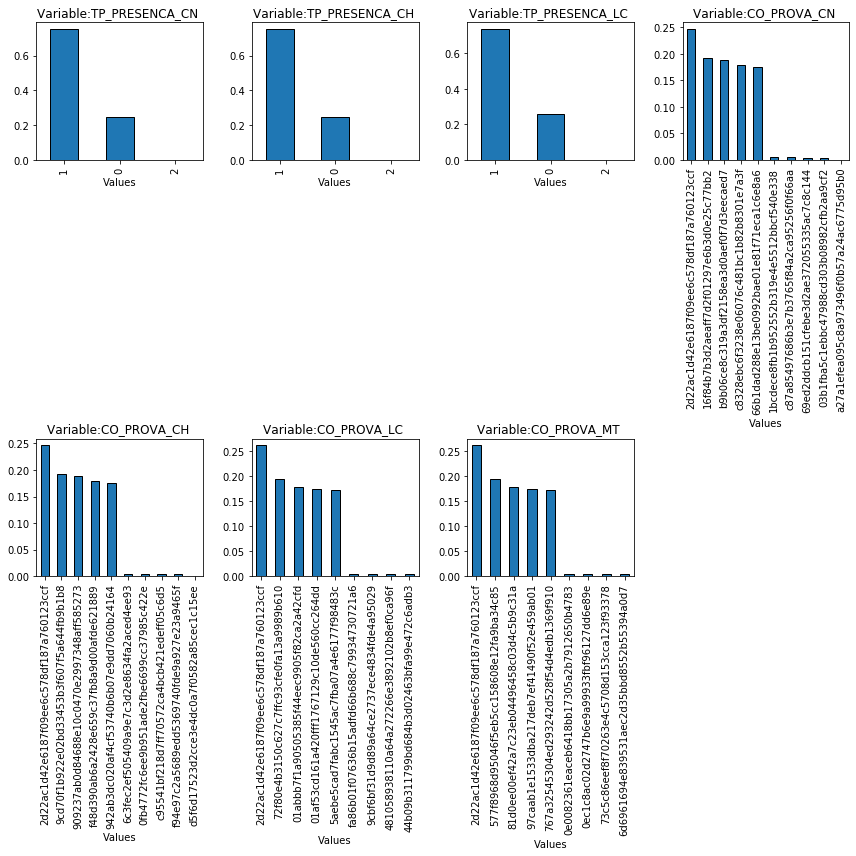

In [9]:
bar_plot(x_train, 
          len(x_train.columns[21:28]),
          x_train.columns[21:28],
          2,
          4)

In [10]:
x_train.NU_NOTA_CN.value_counts()

416.4    17
417.2    16
442.7    15
438.7    14
439.6    14
         ..
616.6     1
626.2     1
692.3     1
482.8     1
344.8     1
Name: NU_NOTA_CN, Length: 2692, dtype: int64

In [11]:
x_train.NU_NOTA_LC.value_counts()


551.5    17
540.3    16
516.2    15
528.2    14
569.4    13
         ..
519.1     1
367.7     1
707.6     1
676.5     1
364.9     1
Name: NU_NOTA_LC, Length: 2774, dtype: int64

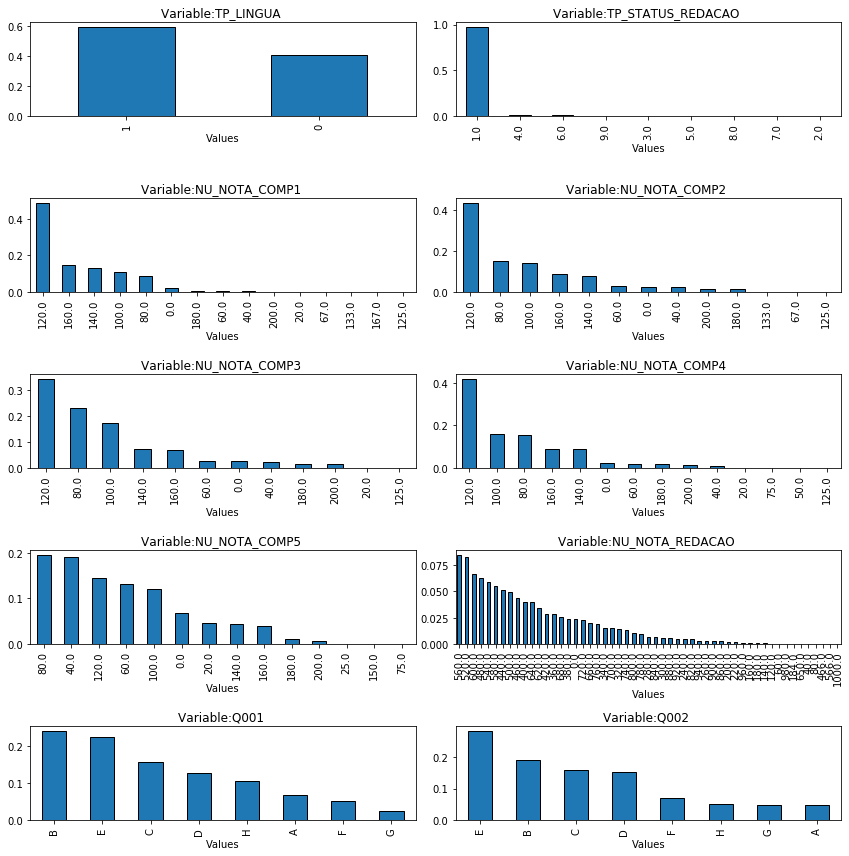

In [12]:
bar_plot(x_train, 
          len(x_train.columns[31:41]),
          x_train.columns[31:41],
          5,
          2)

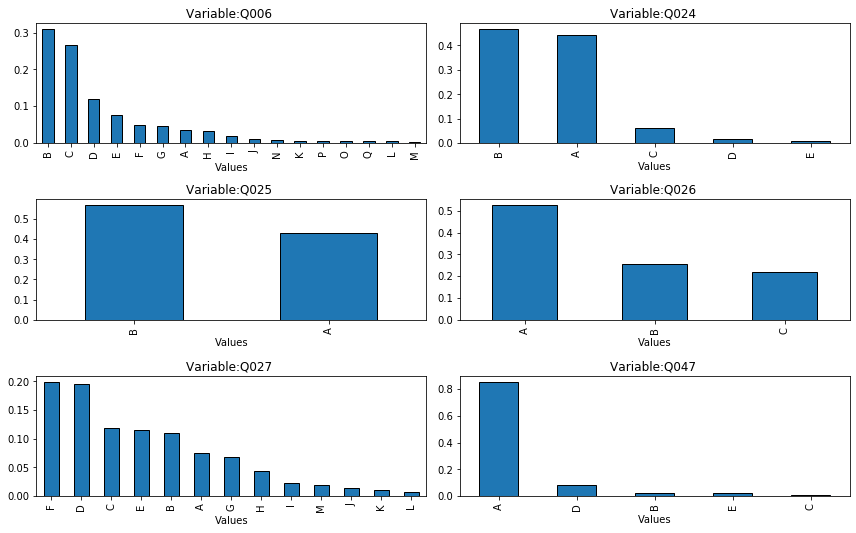

In [13]:
bar_plot(x_train, 
          len(x_train.columns[41:47]),
          x_train.columns[41:47],
          5,
          2)

# Missing values

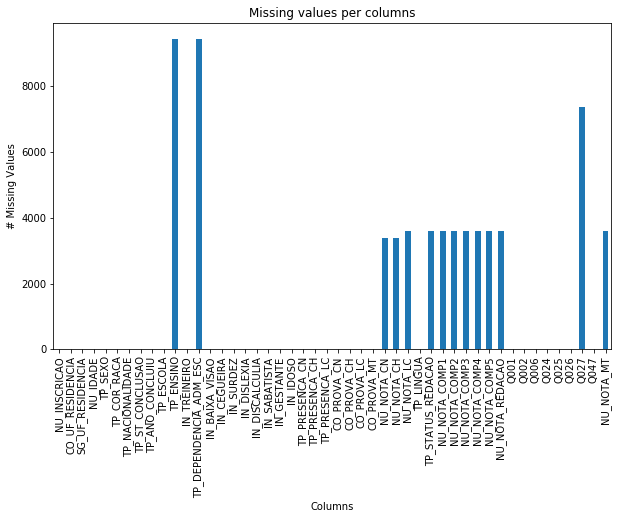

In [14]:
x_train.isnull().sum().plot(kind = 'bar', figsize = (10,6))
plt.title('Missing values per columns')
plt.xlabel('Columns')
plt.ylabel('# Missing Values');

### Count and percentage of columns with missing values

- TP_ENSINO : Tipo de instituição que concluiu ou concluirá o Ensino Médio 
- TP_DEPENDENCIA_ADM_ESC - Dependência administrativa (Escola)
- NU_NOTA_CN - Nota da prova de Ciências da Natureza
- NU_NOTA_CH - Nota da prova de Ciências Humanas
- NU_NOTA_LC - Nota da prova de Linguagens e Códigos
- TP_STATUS_REDACAO - Situação da redação do participante
- NU_NOTA_COMP1 - Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
- NU_NOTA_COMP2 - Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
- NU_NOTA_COMP3 - Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista
- NU_NOTA_COMP4	- Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
- NU_NOTA_COMP5 - Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
- NU_NOTA_REDACAO - Nota da prova de redação
- Q027 - Com que idade você começou a exercer uma atividade remunerada?


In [15]:
missing_data = missing_data_columns_df(x_train)
missing_data

,Missing_Count,Pct_missing
TP_ENSINO,9448,68.81
TP_DEPENDENCIA_ADM_ESC,9448,68.81
NU_NOTA_CN,3389,24.68
NU_NOTA_CH,3389,24.68
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20


We can see a pattern for those columns related to grades (NOTA). Almost all of them have 3597 missing values. Based on that I will assume that those candidates have not attended to the exam (or haven't done a specific test) and drop them from the dataframe. 

The features **TP_ENSINO** , **TP_DEPENDENCIA_ADM_ESC**  and **Q027** have more that 68% and 53% of missing value respectively. That way, they do not give us much information (I will also drop those columns) 

In [16]:
#columns to drop
drop_columns = ['TP_ENSINO', 
                'TP_DEPENDENCIA_ADM_ESC',
                 'Q027']

#Drop above columns of the train dataframe and display missing data df
missing_data = missing_data_columns_df(x_train,
                                       drop_columns,
                                       drop_columns= True)

missing_data


,Missing_Count,Pct_missing
NU_NOTA_CN,3389,24.68
NU_NOTA_CH,3389,24.68
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20
NU_NOTA_COMP5,3597,26.20
NU_NOTA_REDACAO,3597,26.20


# Missing Values per row

Let's now analyse the number of missing values per row. 

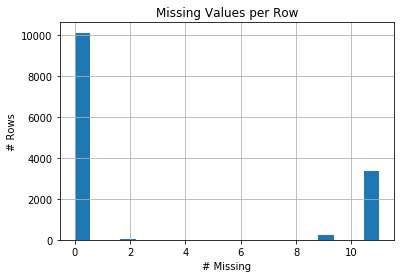

In [17]:
x_train.isnull().sum(axis = 1).hist(bins = 20)
plt.title('Missing Values per Row');
plt.xlabel('# Missing')
plt.ylabel('# Rows');

I will split the dataframe in two. The first one with low missing value per rows (Keep only the rows with at least 40 non-NA values) and the second with high number of missing value per row. Them, I will compare their distributions and check how missing values influence on their distribution. By comparing the distribution I will decide whether or nor I will drop all missing values.


In [18]:
# Split dataframe 
df_new = x_train.copy()

df_low_missing = df_new.dropna(thresh= 40) # Keep only the rows with at least 40 non-NA values


df_high_missing = df_new[~df_new.index.isin(df_low_missing.index)]

df_low_missing.shape, df_high_missing.shape

((10133, 45), (3597, 45))

In [19]:
columns = ['TP_SEXO', 'SG_UF_RESIDENCIA','TP_ESCOLA','Q001' ,'Q047','Q002']

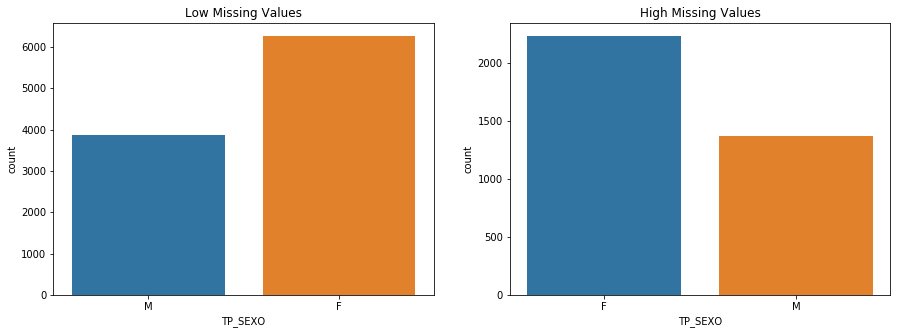

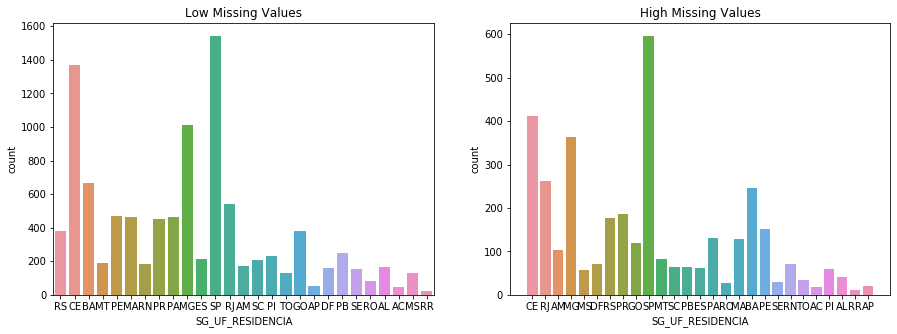

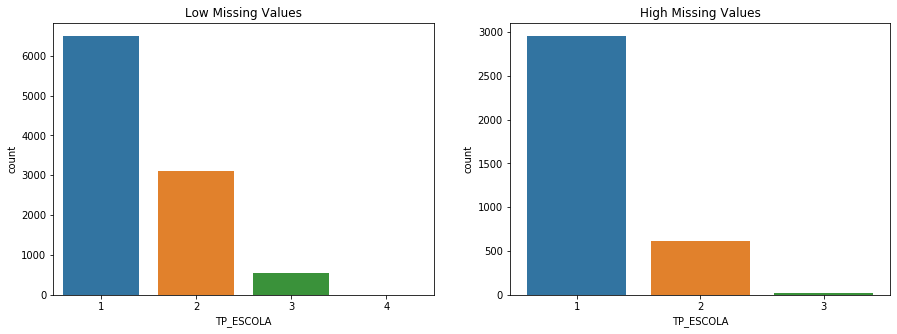

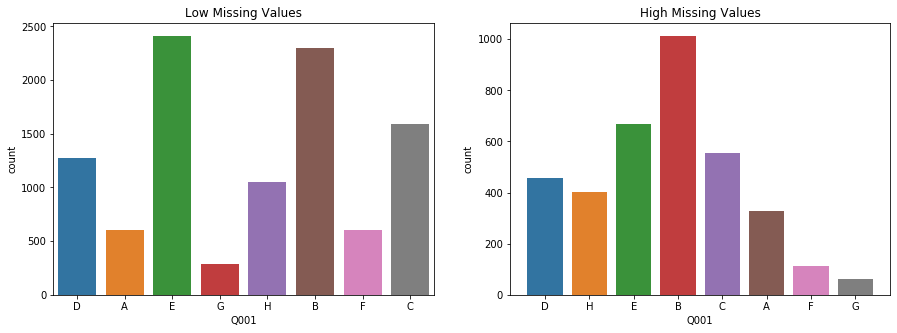

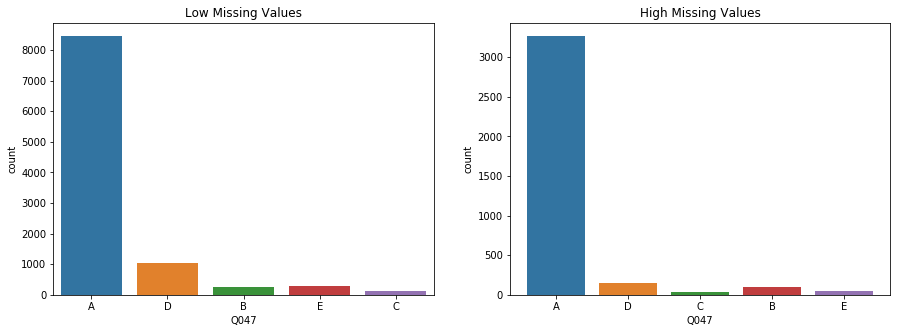

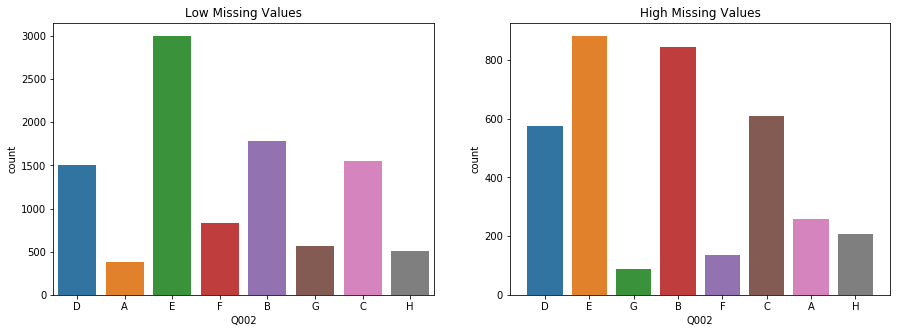

In [20]:
compare_df_plot(df_low_missing , df_high_missing ,columns)

We can notice that some features have distribution completely different .This suggests that these two groups are different from one another.Based on that, from now on, I will drop the missing values and working on the remaining data frame.

In [21]:
# drop rows with missing value
x_train.dropna(axis = 0, inplace = True)

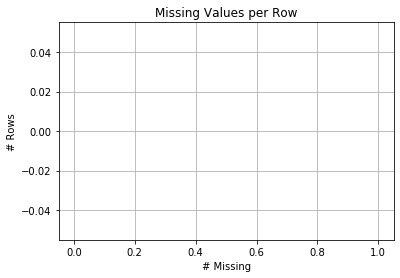

In [22]:
# Sanity check
x_train.isnull().sum(axis = 1)[x_train.isnull().sum(axis = 1) != 0].hist()
plt.title('Missing Values per Row');
plt.xlabel('# Missing')
plt.ylabel('# Rows');

# Feature engineering

Even though there are many features that, intuitively, I believe will not have a bit impact on the result, I have to mathematicaly prove that. Let's do it !  

I start off by dropping columns that are related to the codes of the test. I am assuming that all tests have the same level of difficult and they don't influence much on the final result (the code is just an identifier) 

- CO_PROVA_CN
- CO_PROVA_CH
- CO_PROVA_LC
- CO_PROVA_MT


Also, as we already have the column CO_UF_RESIDENCIA, we don't need the SG_UF_RESIDENCIA feature. I will assume the the candidate lives where he/she was born (simplification). 
- SG_UF_RESIDENCIA

In [23]:
# Drop codes and residence id
drop_code = ['CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','SG_UF_RESIDENCIA']
x_train.drop(drop_code , axis = 1, inplace = True)

In [24]:
x_train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,459.8
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,E,E,C,B,B,A,A,364.5
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,18,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,E,D,C,B,B,C,A,529.2
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,G,F,L,B,B,A,D,566.7


In [25]:
# Count unique values per feature
for column in x_train.columns:
    print(column,':', len(x_train[column].unique()) ,' unique values')

NU_INSCRICAO : 10097  unique values
CO_UF_RESIDENCIA : 27  unique values
NU_IDADE : 53  unique values
TP_SEXO : 2  unique values
TP_COR_RACA : 6  unique values
TP_NACIONALIDADE : 5  unique values
TP_ST_CONCLUSAO : 4  unique values
TP_ANO_CONCLUIU : 11  unique values
TP_ESCOLA : 4  unique values
IN_TREINEIRO : 2  unique values
IN_BAIXA_VISAO : 2  unique values
IN_CEGUEIRA : 1  unique values
IN_SURDEZ : 2  unique values
IN_DISLEXIA : 2  unique values
IN_DISCALCULIA : 2  unique values
IN_SABATISTA : 2  unique values
IN_GESTANTE : 2  unique values
IN_IDOSO : 2  unique values
TP_PRESENCA_CN : 1  unique values
TP_PRESENCA_CH : 1  unique values
TP_PRESENCA_LC : 1  unique values
NU_NOTA_CN : 2680  unique values
NU_NOTA_CH : 2963  unique values
NU_NOTA_LC : 2773  unique values
TP_LINGUA : 2  unique values
TP_STATUS_REDACAO : 9  unique values
NU_NOTA_COMP1 : 15  unique values
NU_NOTA_COMP2 : 13  unique values
NU_NOTA_COMP3 : 12  unique values
NU_NOTA_COMP4 : 14  unique values
NU_NOTA_COMP5 : 14 

We can notice that there are many categorical/ordinal features. Let's numerically encode those that are not numbers. 

Features to be numerically re-encode: 
- **TP_SEXO** - 2 categories
- **Q001** - 8 categories- Até que série seu pai, ou o homem responsável por você, estudou?
- **Q002** - 8 categories - Até que série sua mãe, ou a mulher responsável por você, estudou?
- **Q024** - 5 categories - Na sua residência tem computador?
- **Q025** - 2 categories - Na sua residência tem acesso à Internet?
- **Q026** - 3 categories - Você exerce ou já exerceu atividade remunerada?
- **Q047** - 5 categories - Em que tipo de escola você frequentou o Ensino Médio?

I noticed that for all ordinary features the lowest level of their categories is always A. For example **Q001**, A means that the father of the candidate has no education at all. Because of that I will rank them numerically. 

- The binary variables will be re-encoded to 0 and 1. 


 - I will simplify the feature Q006 to 3 categories (1,2,3) which mean low income, medium income and high income. 


In [26]:
#wage groups 
x_train.Q006 = x_train.Q006.apply(family_income)

In [27]:
df_dummies = feature_engineering_encode(x_train)
display(df_dummies.shape)
df_dummies.head()

(10097, 40)

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,1,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,3,1,0,0,2,0,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,1,0,0,0,0,459.8
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,4,4,1,1,1,0,0,364.5
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,18,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,4,3,1,1,1,2,0,529.2
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,6,5,4,1,1,0,3,566.7


# Correlation ( Feature Selection)

I am still wondering the importance off all those features for our prediction. I will investigate it by looking at their correlation.  

I will check the correlation between the categorical/ordinal features with the math grade and do the same with the non-categorical feature. To do that, I will create two dataframes, one with categorical/ordinal and other with non categorical/ordinal featues.

In [28]:
# Only float 
df_float = df_dummies.select_dtypes(include=['float'])

math_grade = df_dummies.NU_NOTA_MT

df_float.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
0,436.3,495.4,581.2,1.0,120.0,120.0,120.0,80.0,80.0,520.0,399.4
1,474.5,544.1,599.0,1.0,140.0,120.0,120.0,120.0,80.0,580.0,459.8
5,439.7,583.2,410.9,1.0,120.0,120.0,120.0,160.0,100.0,620.0,364.5
6,420.1,604.2,484.5,1.0,100.0,120.0,120.0,120.0,100.0,560.0,529.2
7,619.6,625.8,611.2,1.0,140.0,120.0,120.0,120.0,120.0,620.0,566.7


In [29]:
# Only int (categorical/ordinal) 
df_int = df_dummies.select_dtypes(include=['int'])
df_int['NU_NOTA_MT'] = math_grade
df_int.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_LINGUA,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,43,24,1,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,1,0,0,2,0,399.4
1,23,17,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,459.8
5,29,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,4,4,1,1,1,0,0,364.5
6,51,18,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,0,4,3,1,1,1,2,0,529.2
7,43,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,6,5,4,1,1,0,3,566.7


### Categorical / Ordinal featurs

### - Heatmap 


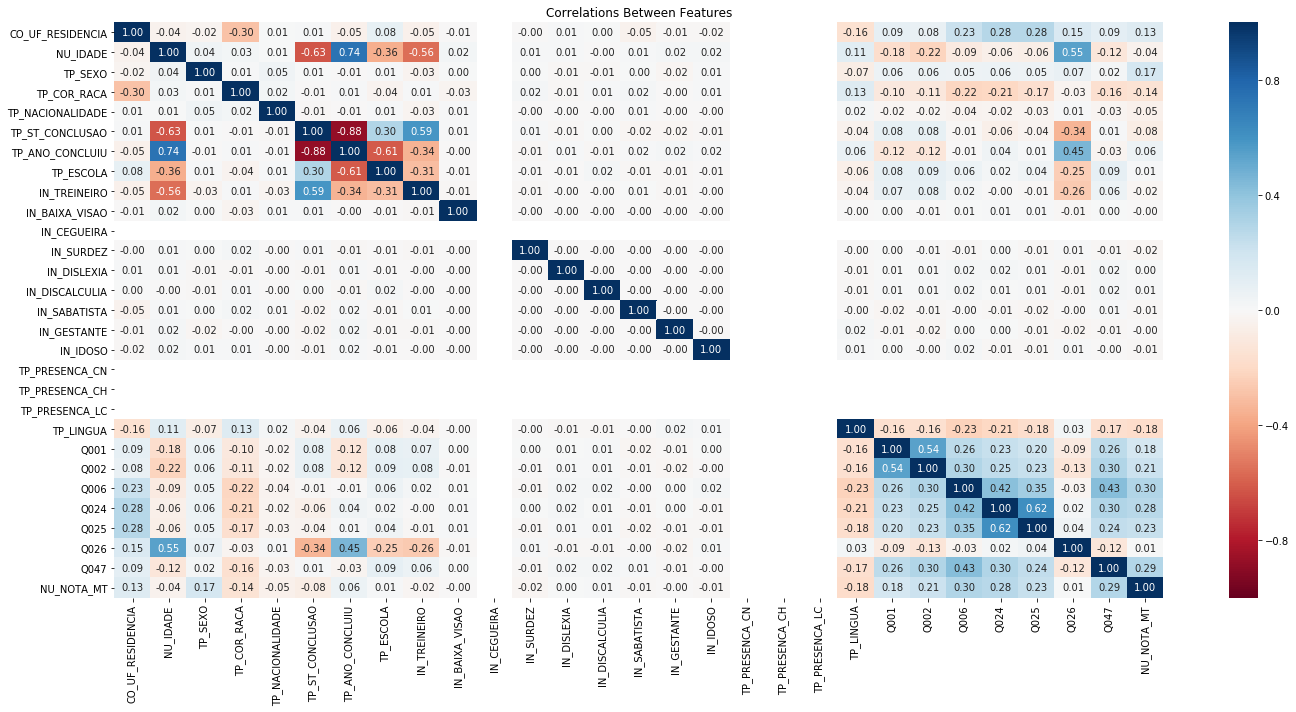

In [30]:
# Use Spearman instead of default Pearson, since we are working with
# ordinal variables!
corr_matrix = df_int.corr(method='spearman')

# Setup
fig, ax = plt.subplots(figsize=(20, 10))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Features")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

### - Continuous Features

### - HeatMap

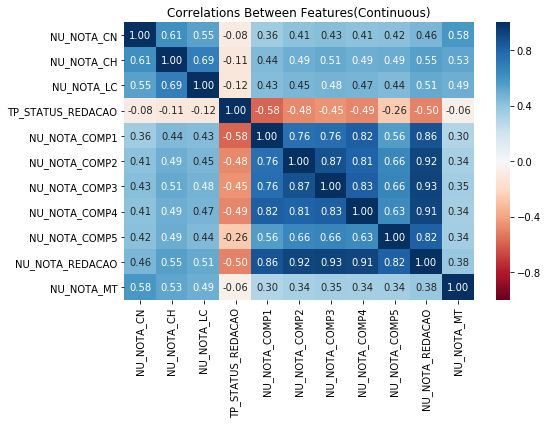

In [31]:
# ordinal variables!
corr_matrix = df_float.corr(method='pearson')

# Setup
fig, ax = plt.subplots(figsize=(8,6))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Features(Continuous)")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

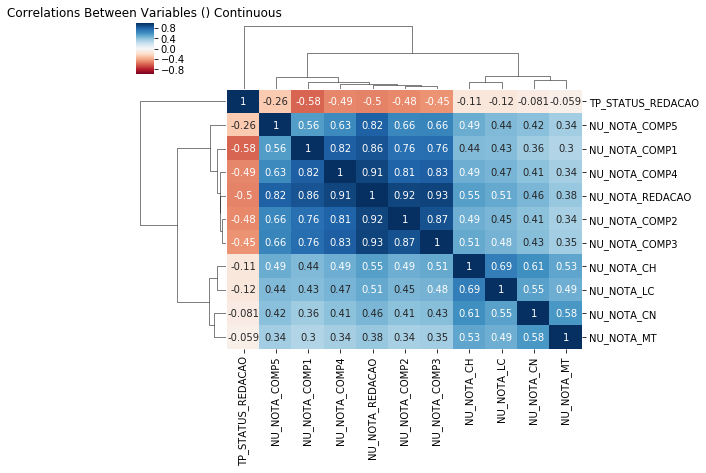

In [32]:
sns.clustermap(corr_matrix, method='ward', cmap='RdBu', annot=True,
               vmin=-1, vmax=1, figsize=(8,6))

plt.title("Correlations Between Variables () Continuous")
#plt.tight_layout()
plt.show()

Looking at the categorical/ordinal features heatmap we don't see much correlation between them and the math grades. On the other hand, when we look at the continuous features clusterMap we see right away clusters of features that might be better to feed our model. I will keep working with the continuous variables from now on. Them I will apply a feature selection test to see if reducing even more the dataset results in a better model.

In [33]:
train_reduced_df = df_float.copy()
display(train_reduced_df.shape)
train_reduced_df.head()

(10097, 11)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
0,436.3,495.4,581.2,1.0,120.0,120.0,120.0,80.0,80.0,520.0,399.4
1,474.5,544.1,599.0,1.0,140.0,120.0,120.0,120.0,80.0,580.0,459.8
5,439.7,583.2,410.9,1.0,120.0,120.0,120.0,160.0,100.0,620.0,364.5
6,420.1,604.2,484.5,1.0,100.0,120.0,120.0,120.0,100.0,560.0,529.2
7,619.6,625.8,611.2,1.0,140.0,120.0,120.0,120.0,120.0,620.0,566.7


In [34]:
# X and Y split
Y_train = train_reduced_df.NU_NOTA_MT


# also drop categorical with low correlation
X_train = train_reduced_df.drop(['NU_NOTA_MT','TP_STATUS_REDACAO'], axis = 1)


In [35]:
display(X_train.shape)
X_train.head()

(10097, 9)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0
1,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0
5,439.7,583.2,410.9,120.0,120.0,120.0,160.0,100.0,620.0
6,420.1,604.2,484.5,100.0,120.0,120.0,120.0,100.0,560.0
7,619.6,625.8,611.2,140.0,120.0,120.0,120.0,120.0,620.0


In [36]:
display(Y_train.shape)

Y_train

(10097,)

0        399.4
1        459.8
5        364.5
6        529.2
7        566.7
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 10097, dtype: float64

##  Base line model

In [37]:
seed = 42


RMSE score for Lasso is 77.1602 with std of 1.5359


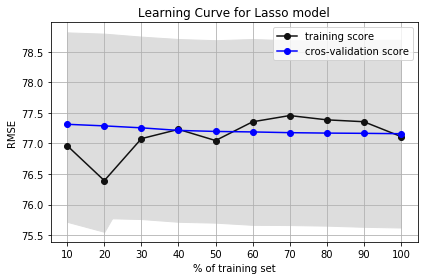



RMSE score for Ridge is 77.1615 with std of 1.534


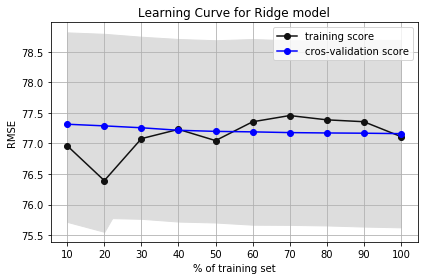



RMSE score for ElasticNet is 77.1608 with std of 1.5352


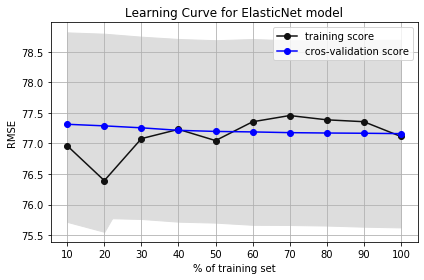



RMSE score for RandromForest is 80.151 with std of 1.8828


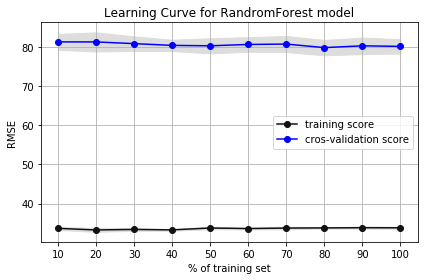



RMSE score for GradientBoost is 74.239 with std of 1.7306


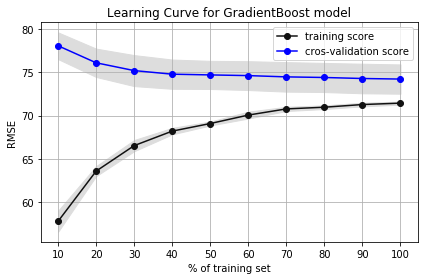



RMSE score for BagginRegressor is 80.1343 with std of 1.9043


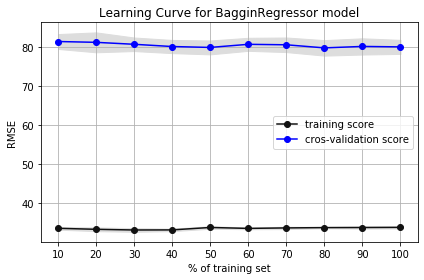



RMSE score for SVM is 101.9129 with std of 2.6402


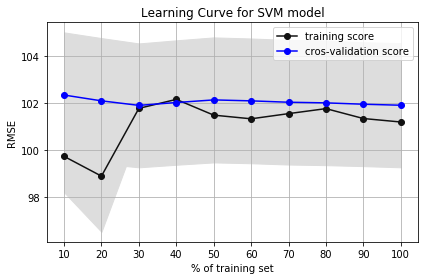

,Base_model,Score
0,Lasso,77.1602
1,Ridge,77.1615
2,ElasticNet,77.1608
3,RandromForest,80.1510
4,GradientBoost,74.2390
5,BagginRegressor,80.1343
6,SVM,101.9129


In [38]:
models = create_base_models()
names, results = evaluate_models(X_train, Y_train, models, learning_curve_=True)
base_line_models_df = df_scores(names,results)
base_line_models_df.rename(columns={"Model_name": "Base_model"}, inplace = True)
base_line_models_df

# Feature Selection

Let's now try to reduce the dataset(number of features) by selecting the best 4 features according to their F scores. 

I will perfom the f_regression univariate feature selection test which calculates the correlation between each regressor and the target variable, than convert to an F score then to a p-value. 


Top 4 features:



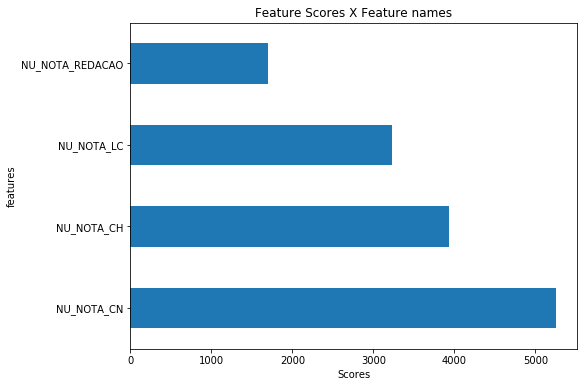

In [39]:
top4_features_df = f_regression_featue_selection(X_train, Y_train, 4, display_df = False)


RMSE score for Lasso is 77.1971 with std of 1.5391


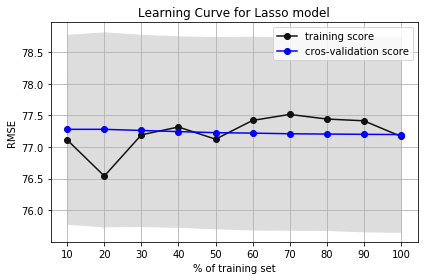



RMSE score for Ridge is 77.1971 with std of 1.5391


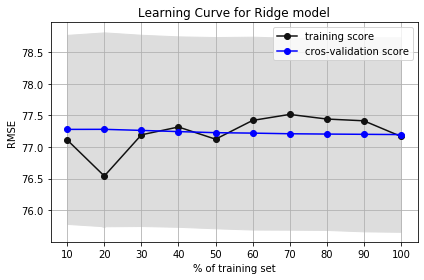



RMSE score for ElasticNet is 77.1971 with std of 1.5392


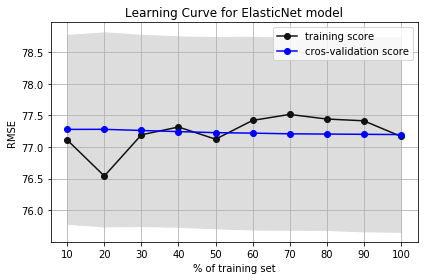



RMSE score for RandromForest is 81.5951 with std of 1.6446


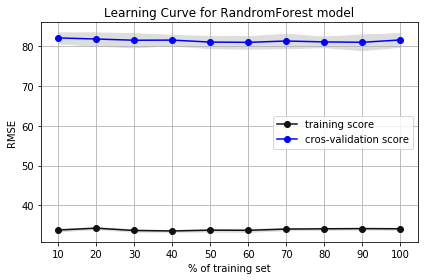



RMSE score for GradientBoost is 74.2036 with std of 1.6971


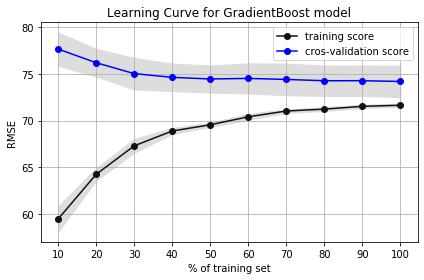



RMSE score for BagginRegressor is 81.5053 with std of 1.6442


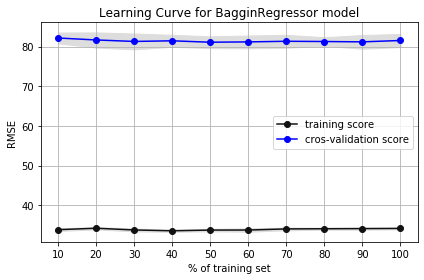



RMSE score for SVM is 101.9091 with std of 2.6401


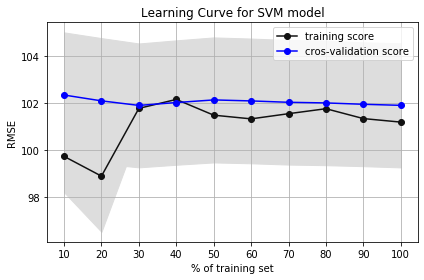

,Base_model,Score,model_F_Selection,Score
0,Lasso,77.1602,Lasso,77.1971
1,Ridge,77.1615,Ridge,77.1971
2,ElasticNet,77.1608,ElasticNet,77.1971
3,RandromForest,80.1510,RandromForest,81.5951
4,GradientBoost,74.2390,GradientBoost,74.2036
5,BagginRegressor,80.1343,BagginRegressor,81.5053
6,SVM,101.9129,SVM,101.9091


In [40]:
models = create_base_models()
names, results = evaluate_models(top4_features_df, Y_train, models, learning_curve_=True)
feature_selection_df = df_scores(names,results)
feature_selection_df.rename(columns={"Model_name": "model_F_Selection"}, inplace = True)
df_score = pd.concat([base_line_models_df,feature_selection_df ], axis = 1)
df_score

# Data Scaling

- StandardScaler

In both cases The gradientBoosting give us the best result. We can see that there's no big difference in using reducing the dataframe.I will keep on working with the reduced dataset.

The next step will be perform scale on the data. Let's see if we get better results by standardizing or normalizing the data. 


RMSE score for standard_Lasso is 77.2068 with std of 1.5567


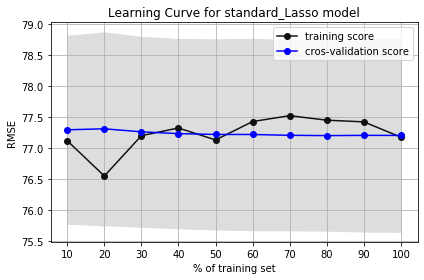



RMSE score for standard_Ridge is 77.1971 with std of 1.5393


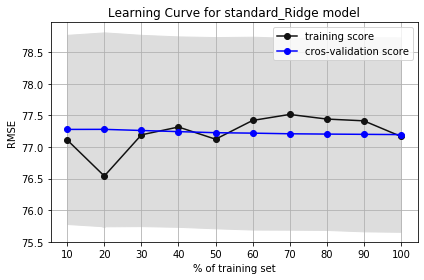



RMSE score for standard_ElasticNet is 78.3503 with std of 1.9158


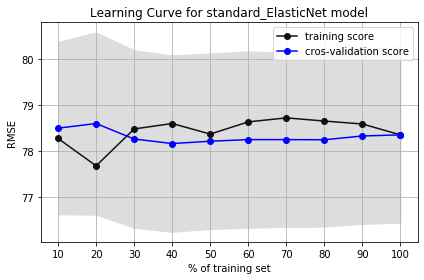



RMSE score for standard_RandromForest is 81.5197 with std of 1.6623


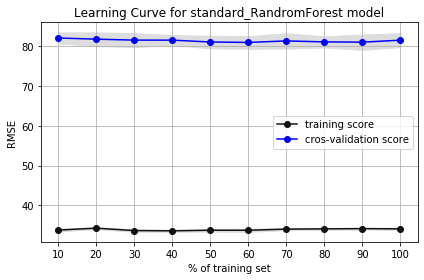



RMSE score for standard_GradientBoost is 74.2043 with std of 1.7008


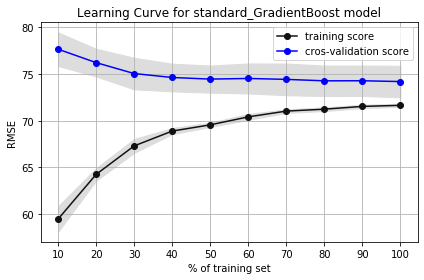



RMSE score for standard_BagginRegressor is 81.4308 with std of 1.665


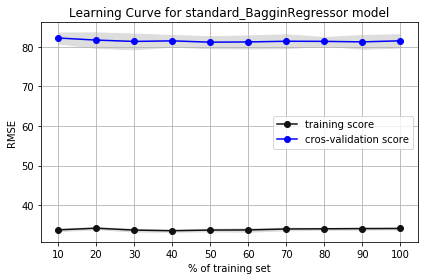



RMSE score for standard_SVM is 78.1375 with std of 1.9493


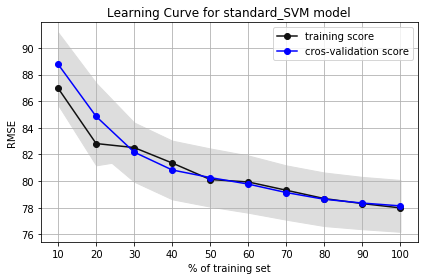

,Base_model,Score,model_F_Selection,Score,model_Scandard,Score
0,Lasso,77.1602,Lasso,77.1971,standard_Lasso,77.2068
1,Ridge,77.1615,Ridge,77.1971,standard_Ridge,77.1971
2,ElasticNet,77.1608,ElasticNet,77.1971,standard_ElasticNet,78.3503
3,RandromForest,80.1510,RandromForest,81.5951,standard_RandromForest,81.5197
4,GradientBoost,74.2390,GradientBoost,74.2036,standard_GradientBoost,74.2043
5,BagginRegressor,80.1343,BagginRegressor,81.5053,standard_BagginRegressor,81.4308
6,SVM,101.9129,SVM,101.9091,standard_SVM,78.1375


In [41]:
# All featues 
models = scaler('standard')
names, results = evaluate_models(top4_features_df, Y_train, models, learning_curve_=True)
standard_scale_df = df_scores(names,results)
standard_scale_df.rename(columns={"Model_name": "model_Scandard"}, inplace= True)
df_score = pd.concat([df_score,standard_scale_df ], axis = 1)
df_score

- MinMaxScaler


RMSE score for minmax_Lasso is 78.273 with std of 1.8109


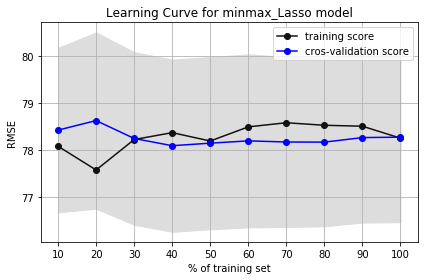



RMSE score for minmax_Ridge is 77.1979 with std of 1.555


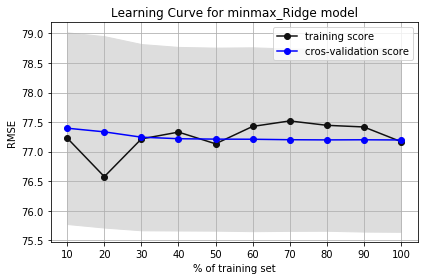



RMSE score for minmax_ElasticNet is 98.1557 with std of 2.5704


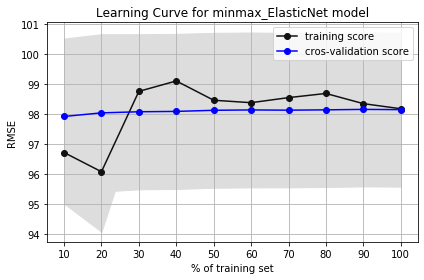



RMSE score for minmax_RandromForest is 81.5629 with std of 1.6687


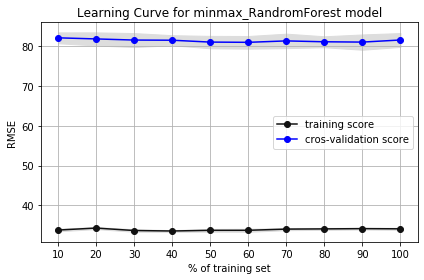



RMSE score for minmax_GradientBoost is 74.2087 with std of 1.6936


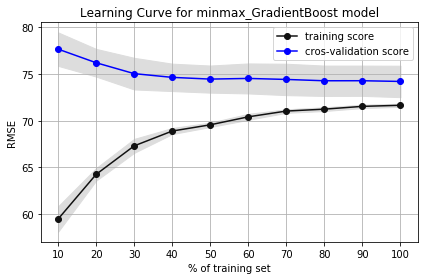



RMSE score for minmax_BagginRegressor is 81.4844 with std of 1.6462


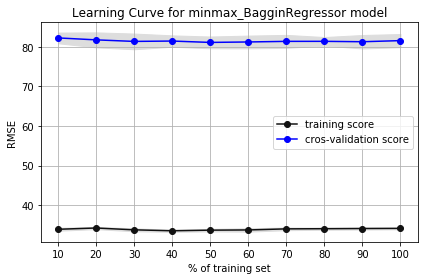



RMSE score for minmax_SVM is 87.5053 with std of 2.4144


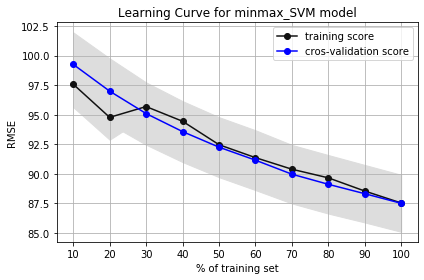

,Base_model,Score,model_F_Selection,Score,model_Scandard,Score,model_MinMax,Score
0,Lasso,77.1602,Lasso,77.1971,standard_Lasso,77.2068,minmax_Lasso,78.2730
1,Ridge,77.1615,Ridge,77.1971,standard_Ridge,77.1971,minmax_Ridge,77.1979
2,ElasticNet,77.1608,ElasticNet,77.1971,standard_ElasticNet,78.3503,minmax_ElasticNet,98.1557
3,RandromForest,80.1510,RandromForest,81.5951,standard_RandromForest,81.5197,minmax_RandromForest,81.5629
4,GradientBoost,74.2390,GradientBoost,74.2036,standard_GradientBoost,74.2043,minmax_GradientBoost,74.2087
5,BagginRegressor,80.1343,BagginRegressor,81.5053,standard_BagginRegressor,81.4308,minmax_BagginRegressor,81.4844
6,SVM,101.9129,SVM,101.9091,standard_SVM,78.1375,minmax_SVM,87.5053


In [42]:
# All featues 
models = scaler('minmax')
names, results = evaluate_models(top4_features_df, Y_train, models, learning_curve_=True)
minmax_scale_df = df_scores(names,results)
minmax_scale_df.rename(columns={"Model_name": "model_MinMax"}, inplace= True)
df_score = pd.concat([df_score, minmax_scale_df ], axis = 1)
df_score

# One Hot encode

Now I am going to apply th encoder technique called one hot encode to the variables with high cardinality (high number of categories).This approach basically convert categorical variable into dummy variables.

I will do the following:
    

===================================== FEATURES TO RE-ENCODE ====================================

- **SG_UF_RESIDENCE** - 27 categories - Sigla da Unidade da Federação de residência
- **TP_SEXO** - 2 categories
- **CO_PROVA_CN** - 10 categories
- **CO_PROVA_CH** - 10 categories
- **CO_PROVA_LC** - 9 categories
- **CO_PROVA_MT** - 9 categories
- **Q001** - 8 categories- Até que série seu pai, ou o homem responsável por você, estudou?
- **Q002** - 8 categories - Até que série sua mãe, ou a mulher responsável por você, estudou?
- **Q006** - 17 categories - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
- **Q024** - 5 categories - Na sua residência tem computador?
- **Q025** - 2 categories - Na sua residência tem acesso à Internet?
- **Q026**- 3 categories - Você exerce ou já exerceu atividade remunerada?
- **Q047** - 5 categories - Em que tipo de escola você frequentou o Ensino Médio?
I noticed that for all ordinary features the lowest level of their categories is always A. For example Q001, A means that the father of the candidate has no education at all. Because of that I will rank them numerically.

For those nominal variable with high cardinality ( **SG_UF_RESIDENCE**, **Q006**, **Q027**) I will apply one hot encode for the top 10 most frequent categories and consider the remaining ones as noise.

The binary variables will be re-encoded to 0 and 1 and the variables with low cardinality I will apply one hot encode.

In [43]:
train_df = pd.read_csv('train.csv')
train_df.drop(['Unnamed: 0'], axis =1 , inplace = True)
test_df = pd.read_csv('test.csv')

display(train_df.head())
display('train_df shape:', train_df.shape)
print()
display('test_df shape:', test_df.shape)
display(test_df.head())


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

'train_df shape:'

(13730, 166)

'test_df shape:'

(4576, 47)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [44]:
# Y 
Y_math_grade = train_df.NU_NOTA_MT

#X
x_train = train_df.loc[:, test_df.columns] # all test_df columns 
x_train['NU_NOTA_MT'] = Y_math_grade # Add NU_NOTA_MT at the end of the df

display('train_subset_df shape:',x_train.shape)

x_train.head()

'train_subset_df shape:'

(13730, 48)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [45]:
drop_columns = ['TP_ENSINO', 
                'TP_DEPENDENCIA_ADM_ESC',
                 'Q027']

#Drop above columns of the train dataframe and display missing data df
missing_data = missing_data_columns_df(x_train,
                                       drop_columns,
                                       drop_columns= True)

missing_data


,Missing_Count,Pct_missing
NU_NOTA_CN,3389,24.68
NU_NOTA_CH,3389,24.68
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20
NU_NOTA_COMP5,3597,26.20
NU_NOTA_REDACAO,3597,26.20


In [46]:
# drop rows with missing value
x_train.dropna(axis = 0, inplace = True)

In [47]:
x_train.isnull().sum()

NU_INSCRICAO         0
CO_UF_RESIDENCIA     0
SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047       

In [48]:
df_dummies = feature_engineering_encode(x_train , apply_ohe= True)
df_dummies.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q024,Q025,Q026,Q047,NU_NOTA_MT,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_TO,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_RR,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_A,Q006_I,Q006_J,Q006_N,Q006_K,Q006_P,Q006_L,Q006_Q,Q006_O,Q006_M,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,1,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,3,0,0,2,0,399.4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,0,0,0,0,459.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,4,4,1,1,0,0,364.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,18,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,420.1,604.2,484.5,0,1.0,100.0,120.0,1

In [49]:
Y = df_dummies.NU_NOTA_MT

df_dummies.drop('NU_NOTA_MT', axis = 1, inplace = True)

In [50]:
train_NU_INSCRICAO = df_dummies.NU_INSCRICAO
df_dummies.drop('NU_INSCRICAO', axis = 1, inplace = True)

In [51]:
seed = 42



RMSE score for Lasso is 74.8481 with std of 1.6892


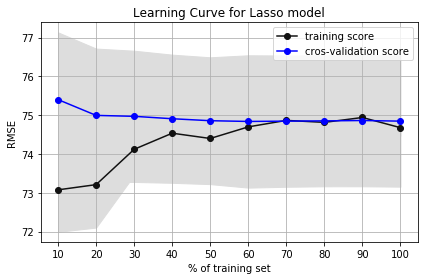



RMSE score for Ridge is 74.4839 with std of 2.0389


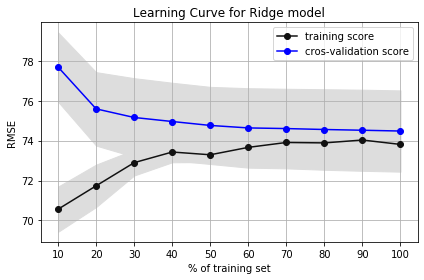



RMSE score for ElasticNet is 75.3863 with std of 1.6163


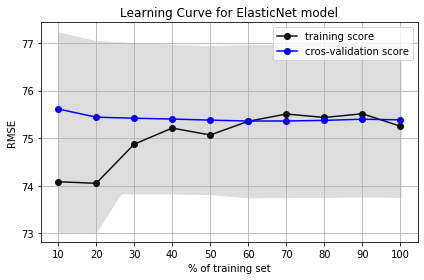



RMSE score for RandromForest is 76.4096 with std of 1.265


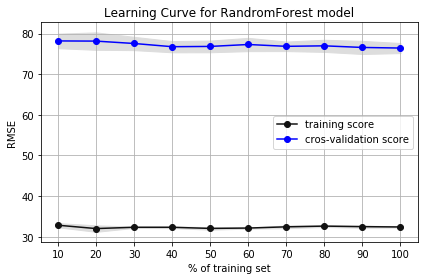



RMSE score for GradientBoost is 71.9574 with std of 1.8284


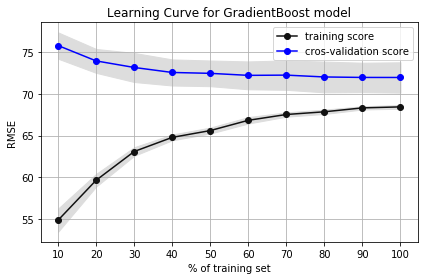



RMSE score for BagginRegressor is 76.3752 with std of 1.225


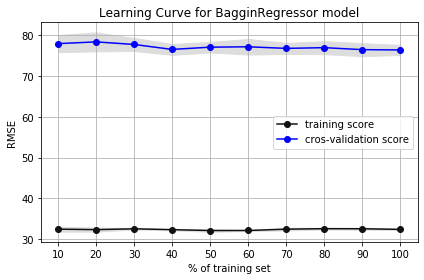



RMSE score for SVM is 101.9103 with std of 2.6406


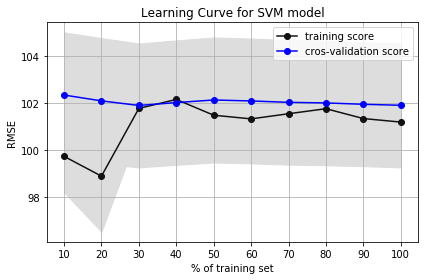

,Base_model,Score
0,Lasso,74.8481
1,Ridge,74.4839
2,ElasticNet,75.3863
3,RandromForest,76.4096
4,GradientBoost,71.9574
5,BagginRegressor,76.3752
6,SVM,101.9103


In [52]:
# All featues 
models = create_base_models()
names, results = evaluate_models(df_dummies, Y, models, learning_curve_=True)
base_line_dummies_df = df_scores(names,results)
base_line_dummies_df.rename(columns={"Model_name": "Base_model"}, inplace = True)
base_line_dummies_df


# Dummies Feature selection

Top 10 features:



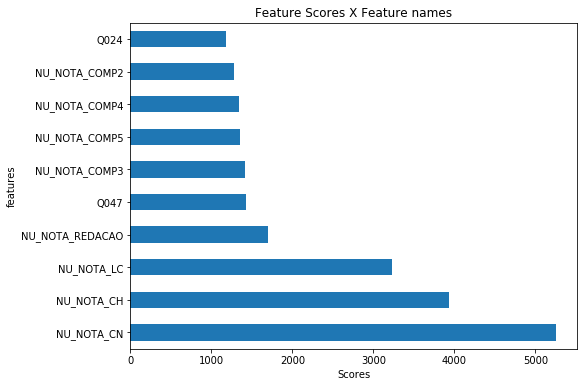

In [53]:
top10_features_df = f_regression_featue_selection(df_dummies, Y,10, display_df = False)


RMSE score for Lasso is 95.1877 with std of 2.5985


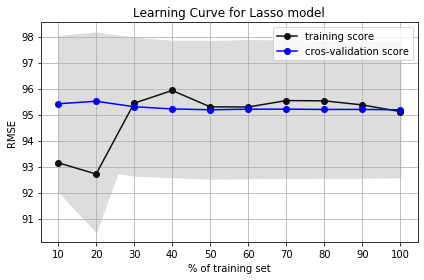



RMSE score for Ridge is 94.8406 with std of 2.5606


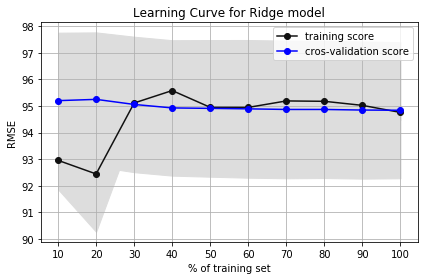



RMSE score for ElasticNet is 96.3332 with std of 2.6172


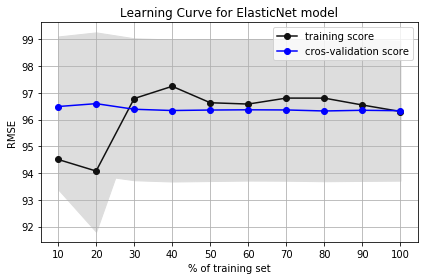



RMSE score for RandromForest is 99.6816 with std of 2.4278


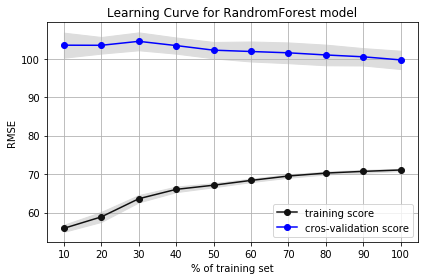



RMSE score for GradientBoost is 90.8463 with std of 2.7203


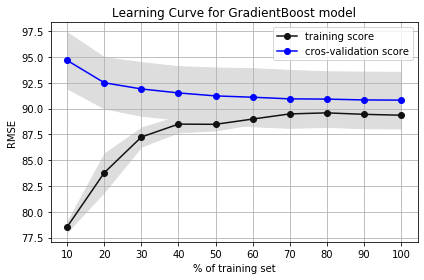



RMSE score for BagginRegressor is 99.723 with std of 2.3497


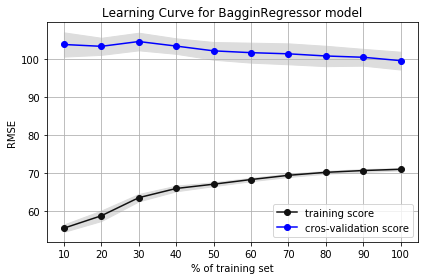



RMSE score for SVM is 98.4515 with std of 2.7055


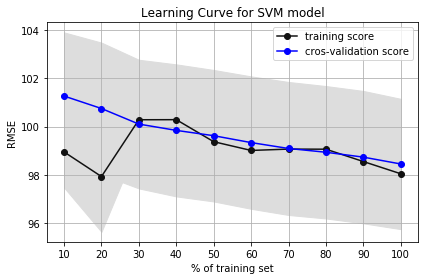

,Base_model,Score,model_F_Selection,Score
0,Lasso,74.8481,Lasso,95.1877
1,Ridge,74.4839,Ridge,94.8406
2,ElasticNet,75.3863,ElasticNet,96.3332
3,RandromForest,76.4096,RandromForest,99.6816
4,GradientBoost,71.9574,GradientBoost,90.8463
5,BagginRegressor,76.3752,BagginRegressor,99.7230
6,SVM,101.9103,SVM,98.4515


In [54]:
models = create_base_models()
names, results = evaluate_models(top10_features_df, Y, models, learning_curve_=True)
feature_selection_dummies_df = df_scores(names,results)
feature_selection_dummies_df.rename(columns={"Model_name": "model_F_Selection"}, inplace = True)
df_score = pd.concat([base_line_dummies_df,feature_selection_dummies_df ], axis = 1)
df_score

# Dummies Data Scaling  



RMSE score for standard_Lasso is 74.5684 with std of 1.8943


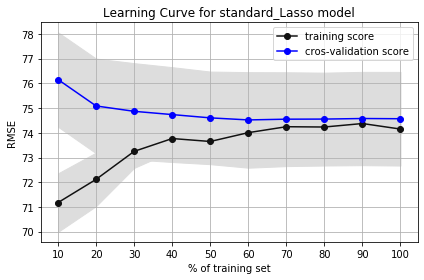



RMSE score for standard_Ridge is 74.4912 with std of 2.045


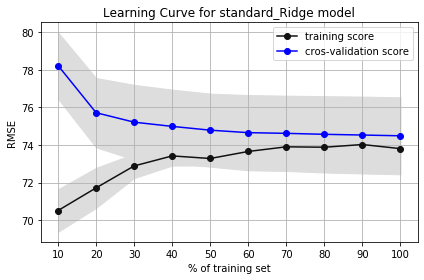



RMSE score for standard_ElasticNet is 75.3172 with std of 2.2162


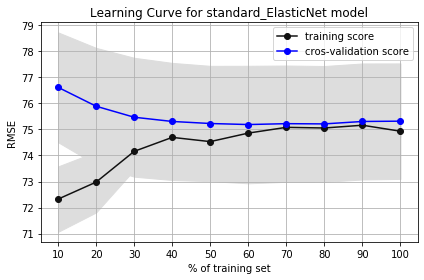



RMSE score for standard_RandromForest is 76.3824 with std of 1.2668


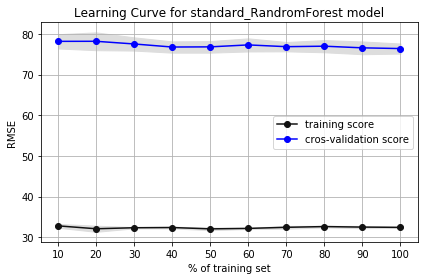



RMSE score for standard_GradientBoost is 71.9584 with std of 1.8345


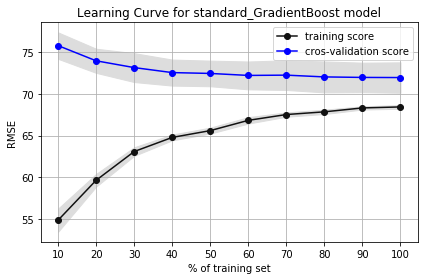



RMSE score for standard_BagginRegressor is 76.3745 with std of 1.2735


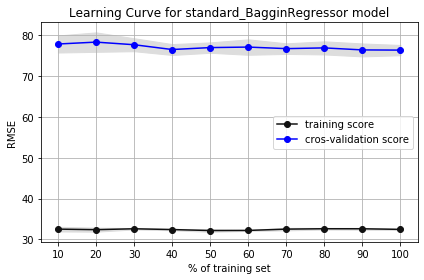



RMSE score for standard_SVM is 85.7248 with std of 2.4872


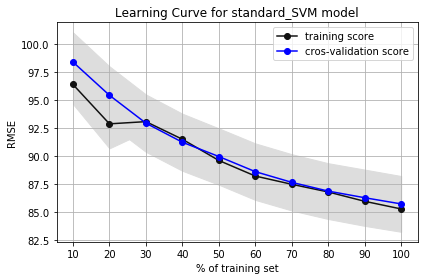

,Base_model,Score,model_F_Selection,Score,model_Scandard,Score
0,Lasso,74.8481,Lasso,95.1877,standard_Lasso,74.5684
1,Ridge,74.4839,Ridge,94.8406,standard_Ridge,74.4912
2,ElasticNet,75.3863,ElasticNet,96.3332,standard_ElasticNet,75.3172
3,RandromForest,76.4096,RandromForest,99.6816,standard_RandromForest,76.3824
4,GradientBoost,71.9574,GradientBoost,90.8463,standard_GradientBoost,71.9584
5,BagginRegressor,76.3752,BagginRegressor,99.7230,standard_BagginRegressor,76.3745
6,SVM,101.9103,SVM,98.4515,standard_SVM,85.7248


In [55]:
# All featues 
models = scaler('standard')
names, results = evaluate_models(df_dummies, Y, models, learning_curve_=True)
standard_scale_dummies_df = df_scores(names,results)
standard_scale_dummies_df.rename(columns={"Model_name": "model_Scandard"}, inplace= True)
df_score = pd.concat([df_score,standard_scale_dummies_df ], axis = 1)
df_score


# Dummies MinMaxScaler


RMSE score for minmax_Lasso is 76.0178 with std of 2.1582


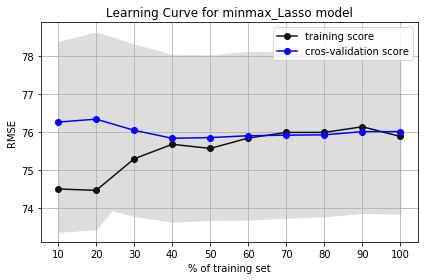



RMSE score for minmax_Ridge is 74.4844 with std of 2.0573


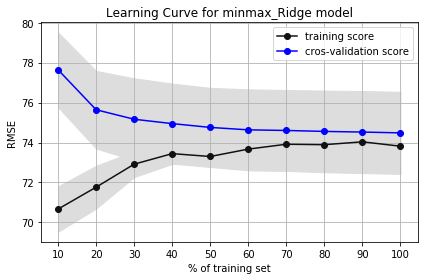



RMSE score for minmax_ElasticNet is 90.6261 with std of 2.7162


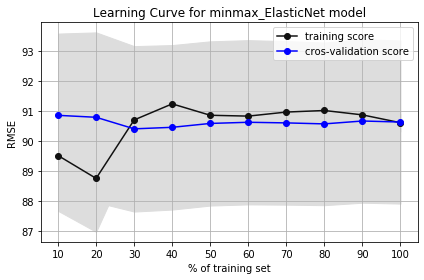



RMSE score for minmax_RandromForest is 76.4062 with std of 1.2923


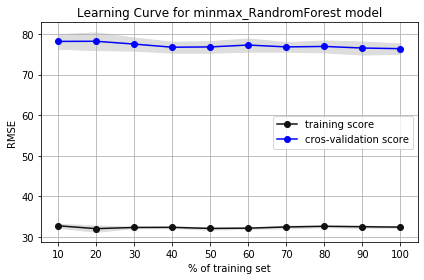



RMSE score for minmax_GradientBoost is 71.9569 with std of 1.834


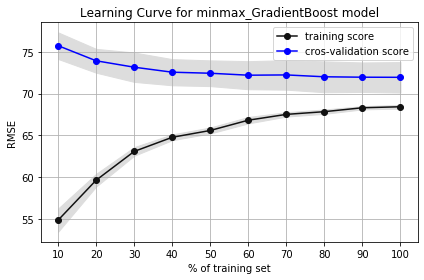



RMSE score for minmax_BagginRegressor is 76.3613 with std of 1.2296


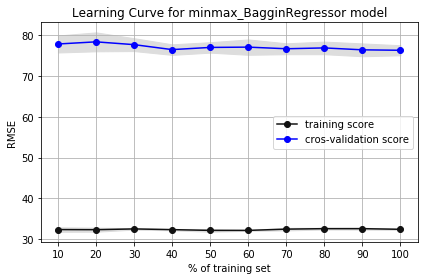



RMSE score for minmax_SVM is 94.8302 with std of 2.6373


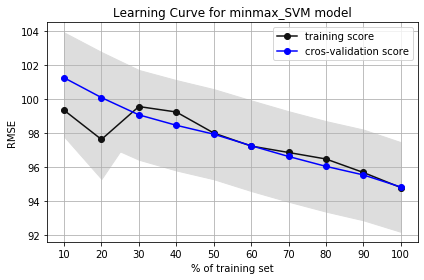

,Base_model,Score,model_F_Selection,Score,model_Scandard,Score,model_MinMax,Score
0,Lasso,74.8481,Lasso,95.1877,standard_Lasso,74.5684,minmax_Lasso,76.0178
1,Ridge,74.4839,Ridge,94.8406,standard_Ridge,74.4912,minmax_Ridge,74.4844
2,ElasticNet,75.3863,ElasticNet,96.3332,standard_ElasticNet,75.3172,minmax_ElasticNet,90.6261
3,RandromForest,76.4096,RandromForest,99.6816,standard_RandromForest,76.3824,minmax_RandromForest,76.4062
4,GradientBoost,71.9574,GradientBoost,90.8463,standard_GradientBoost,71.9584,minmax_GradientBoost,71.9569
5,BagginRegressor,76.3752,BagginRegressor,99.7230,standard_BagginRegressor,76.3745,minmax_BagginRegressor,76.3613
6,SVM,101.9103,SVM,98.4515,standard_SVM,85.7248,minmax_SVM,94.8302


In [56]:
# All featues 
models = scaler('minmax')
names, results = evaluate_models(df_dummies, Y, models, learning_curve_=True)
minmax_scale_dummies_df = df_scores(names,results)
minmax_scale_dummies_df.rename(columns={"Model_name": "model_MinMax"}, inplace= True)
df_score = pd.concat([df_score, minmax_scale_dummies_df ], axis = 1)
df_score

# Hyper parameter tuning using GridSearchCV

#### Note: Still working on it

- GradientBoosting

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
f_selected_scaled = scaler.fit_transform(top4_features_df)



In [ ]:
gb_model = GradientBoostingRegressor()
param_grid = {
    'min_samples_split':[15],'max_leaf_nodes':[3],'max_features':[4],
    'max_depth': [3] ,
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'n_estimators': [100],
    'subsample':[0.8],
    'validation_fraction': [0.8]
    
    
    
}


In [ ]:
rmse_score,best_estimator =  model_tuning( gb_model , 
                                          param_grid,
                                          top4_features_df,
                                          Y_train, 
                                          'GradientBoostingRegressor',
                                          learning_curve_ = False)

best_estimator

# Random_Forest 

- Random Forest

In [ ]:
rf_model = RandomForestRegressor()
param_grid_rf = { 'n_estimators': [400,500],
                 'max_depth': [3,5,8,],
                 'max_leaf_nodes':[None],
                 'min_impurity_split':[None, 3, 5, 8],
                 'min_samples_leaf': [1,3],
                 'min_samples_split':[2,3],
                 'n_jobs': [-1]
            
}

rmse_score,best_estimator =  model_tuning( rf_model ,
                                          param_grid_rf,
                                          top4_features_df, Y_train, 
                                          'Random_Forest',
                                          learning_curve_ = False)

In [ ]:
best_estimator

- Random Forest - Scaled top4

In [105]:
rf_model = RandomForestRegressor()
param_grid_rf = { 'n_estimators': [400,500],
                 'max_depth': [8,10],
                 'max_leaf_nodes':[None],
                 'min_impurity_split':[None],
                 'min_samples_leaf': [1,3,5,8],
                 'min_samples_split':[2,3],
                 'n_jobs': [-1]
            
}

rmse_score,best_estimator =  model_tuning( rf_model ,
                                          param_grid_rf,
                                          f_selected_scaled, Y_train, 
                                          'Random_Forest',
                                          learning_curve_ = False)

name: Random_Forest - RMSE score: 74.7765


# Test Set Preprocessing

In [58]:
clean_test, test_NU_INSCRICAO = clean_test_df(test_df, X_train.columns)


In [59]:
clean_test

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0
1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0
2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0
...,...,...,...,...,...,...,...,...,...
4571,398.3,558.2,511.6,120.0,120.0,120.0,100.0,40.0,500.0
4572,427.6,579.7,471.1,100.0,100.0,100.0,120.0,100.0,520.0
4573,639.2,643.8,604.9,160.0,140.0,120.0,140.0,80.0,640.0
4574,427.1,467.9,540.2,140.0,80.0,80.0,140.0,80.0,520.0


# Predict

### 1

In [60]:
RF = RandomForestRegressor( 
           max_depth=8,
           min_samples_leaf=1,
           min_samples_split=2,
           n_estimators= 500,
           n_jobs=-1,
           random_state= seed,
)

In [61]:
scaler = StandardScaler()  
x_train_Scaled = scaler.fit_transform(X_train)  
#x_test_Scaled = sc.transform(x_test)

In [62]:
RF.fit(x_train_Scaled, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

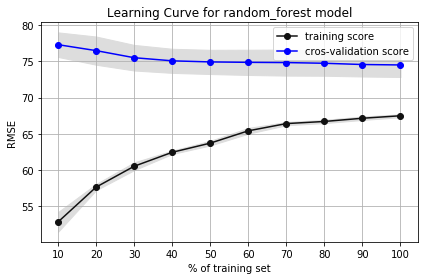

In [67]:
name = 'random_forest'
model = RF
plot_learning_curve(x_train_Scaled, Y_train, model, name)

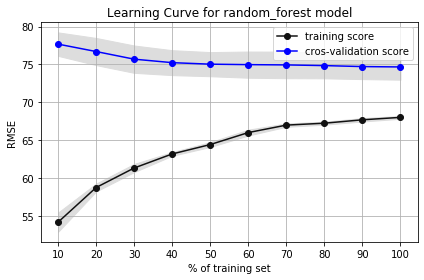

In [65]:
name = 'random_forest'
model = RF
plot_learning_curve(top4_features_df, Y_train, model, name)

---

### 2

---

In [215]:
x_test_Scaled = sc.transform(test_df)
predict2 = regressor.predict(x_test_Scaled)
predict2

array([418.7479, 442.2484, 591.2832, ..., 693.6301, 445.4405, 447.6738])

In [179]:
predict = regressor.predict(x_test_Scaled)

In [180]:
predict

array([418.7125, 441.9722, 592.6606, ..., 693.2565, 444.9356,  18.7074])

In [217]:
answer_df = pd.DataFrame()
answer_df['NU_INSCRICAO'] = test_NU_INSCRICAO
answer_df['NU_NOTA_MT'] = predict2
answer_df.to_csv('answer.csv', index = False, header=True)